# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


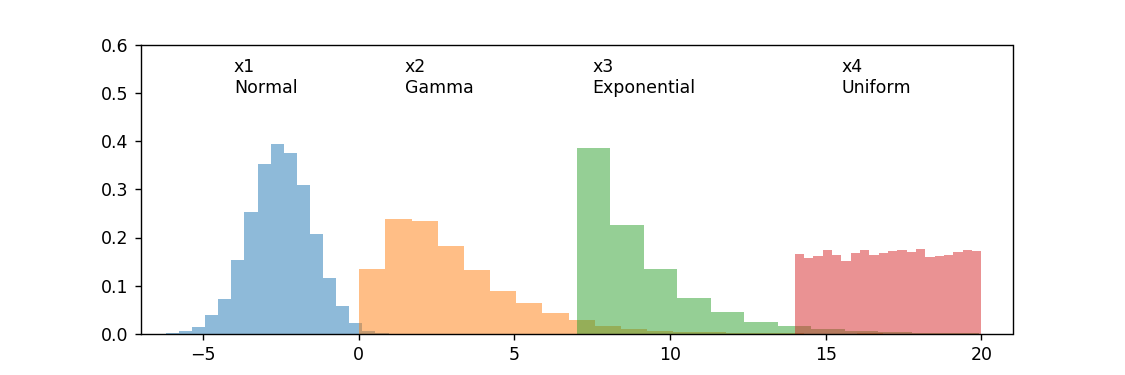

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


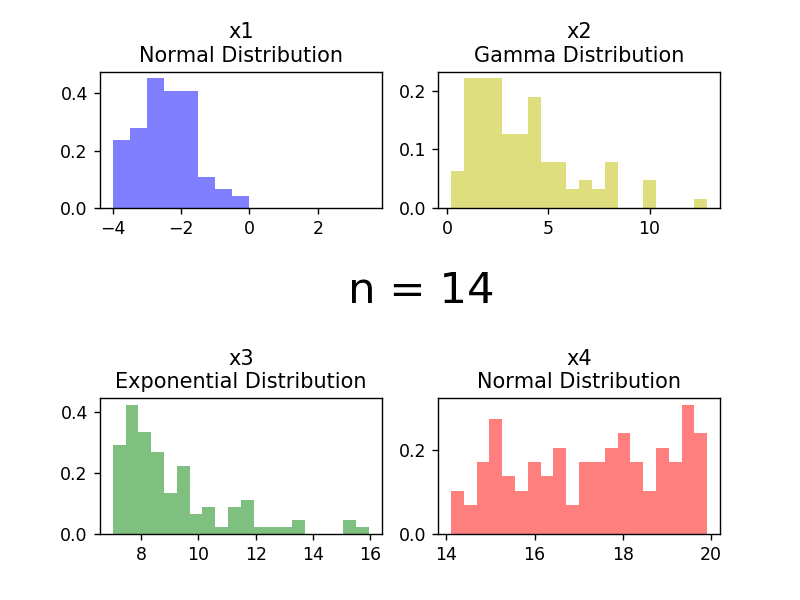

In [61]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
n = 100
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)




def update(curr):
    
    u1_histogram = plt.subplot(gridspec.GridSpec(3,2)[0, 0])
    u2_histogram = plt.subplot(gridspec.GridSpec(3,2)[0, 1])
    l1_histogram = plt.subplot(gridspec.GridSpec(3,2)[2, 0])
    l2_histogram = plt.subplot(gridspec.GridSpec(3,2)[2, 1])
    indicator = plt.subplot(gridspec.GridSpec(3,2)[1, :])
    

   
    if curr == n: 
        a.event_source.stop()
    l=[u1_histogram, u2_histogram, l1_histogram, l2_histogram]
    
    for i in l:
        i.cla()
    
    u1_histogram.hist(x1[:n], bins=np.arange(-4, 4, 0.5), normed=True, alpha=0.5, color='b')
    u1_histogram.set_title("x1\nNormal Distribution")
   
    
    u2_histogram.hist(x2[:n], bins=20, normed=True, alpha=0.5, color='y')
    u2_histogram.set_title("x2\nGamma Distribution")
 
    
    l1_histogram.hist(x3[:n], bins=20, normed=True, alpha=0.5, color='g') 
    l1_histogram.set_title("x3\nExponential Distribution")
    
    
    l2_histogram.hist(x4[:n], bins=20, normed=True, alpha=0.5, color='r')
    l2_histogram.set_title("x4\nNormal Distribution")  
    
    
    indicator.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
    indicator.set(frame_on=False)
    indicator.annotate('n = {}'.format(curr), [0.4,0.5],fontsize = 25)


fig = plt.figure()
    
a=FuncAnimation(fig, update, interval=100)   
plt.savefig("practice")